In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
from sklearn import metrics

In [14]:
df=pd.read_csv('storedata.csv')

In [15]:
df.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


# Performing EDA

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#% matplotlib inline

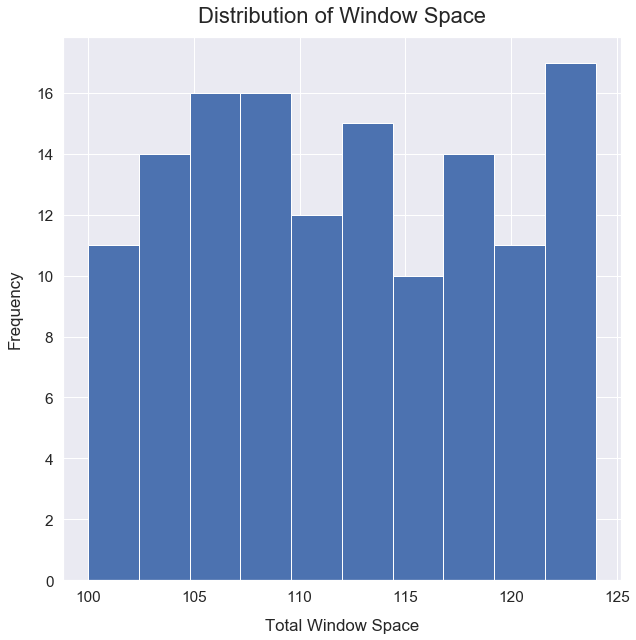

In [17]:
sns.set(font_scale=1.4)
df['Window'].plot(kind='hist', figsize=(10, 10));
plt.xlabel("Total Window Space", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Distribution of Window Space", y=1.015, fontsize=22);

In [18]:
df.shape

(136, 19)

In [19]:
df['Performance'].value_counts()

Good    69
Bad     67
Name: Performance, dtype: int64

In [20]:
df.isnull().sum()

Town                  0
Country               0
Store ID              0
Manager name          0
Staff                 0
Floor Space           0
Window                0
Car park              0
Demographic score     0
Location              0
40min population      0
30 min population     0
20 min population     0
10 min population     0
Store age             0
Clearance space       0
Competition number    0
Competition score     0
Performance           0
dtype: int64

In [21]:
df['Town'].unique()

array([' Swinton (Greater Manchester)', ' Stamford', ' Skipton',
       ' Stratton', ' Shepperton', ' Southwell',
       ' Swinton (South Yorkshire)', ' Sowerby Bridge', ' Sheffield',
       ' Stanley', ' Shepshed', ' Staines', ' Sutton', ' Stafford',
       ' Sawbridgeworth', ' Stocksbridge', ' Salcombe', ' Southminster',
       ' Slough', ' Sedgley', ' St Mawes', ' Sudbury', ' Steyning',
       ' Southampton', ' Snaith', ' Sampford Courtenay', ' Skelmersdale',
       ' Scunthorpe', ' Sunderland', ' Streatham', ' Saxmundham',
       ' Sandiacre', ' Stretford', ' St Austell', ' Stalbridge',
       ' Southwick', ' Shefford', ' Stanford-le-Hope', ' Swindon',
       ' Stainforth', ' St Helens', ' Stourbridge', ' Swadlincote',
       ' Sale', ' Seaham', ' Southwold', ' Shanklin', ' South Shields',
       ' Southport', ' Stalham', ' Shaw & Crompton', ' South Elmsall',
       ' St Blazey', ' Sherborne', ' Smethwick', ' Stow-on-the-Wold',
       ' Sandwich', ' Shaftesbury', ' Spalding', ' Sto

In [22]:
df['Manager name'].unique()

array(['Roger', 'Ella', 'Valentina', 'Antonia', 'Gabriel', 'Sarah',
       'James', 'Ashley', 'Guilherme', 'Grace', 'Franco', 'Olivia',
       'Emily', 'Matheus', 'Megane', 'Samuel', 'Emma', 'Agustina',
       'Justin', 'Sebasti�n', 'Isabella', 'Laurence', 'J�lia', 'Luc�a',
       'Nicol�s', 'Sof�a', 'Luiz', 'Abigail', 'Fernanda', 'Mart�n',
       'Nathan', 'Francisca', 'Vin�cius', 'Madison', 'Hannah', 'Antony',
       'Tom�s', 'Samantha', 'Ryan', 'Logan', 'Sydney', 'Jeremy',
       'Larissa', 'Ava', 'Jacob', 'Yasmin', 'Vicente', 'Ethan', 'Micaela',
       'Matthew', 'Jo�o', 'Taylor', 'Xavier', 'Beatriz', 'Olivier',
       'Christopher', 'Sophia', 'Dylan', 'Jessica', 'Ana', 'Connor',
       'Julie', 'Liam', 'Jo', 'Victoria', 'Daniel', 'Camila', 'Lucas',
       'Diego', 'Megan', 'Martina', 'Noemie', 'Rosalie', 'Andrew',
       'Catalina', 'Alexis', 'Giovanna', 'Jos�', 'Felix', 'Audrey',
       'Nicholas', 'Benjam�n', 'Crist�bal', 'Noah', 'Joshua', 'Maria',
       'Kate', 'Michael', 'Thi

In [23]:
df=df.drop('Country',axis=1)

In [24]:
df.shape

(136, 18)

In [25]:
df=df.drop('Store ID',axis=1)

In [26]:
df.shape

(136, 17)

In [27]:
df.head()

,Town,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [28]:
df=df.drop('Manager name',axis=1)

In [29]:
df.shape

(136, 16)

In [30]:
df.head()

,Town,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [31]:
df['Car park'].unique()

array(['Yes', 'No', 'Y', 'N'], dtype=object)

In [32]:
df["Car park"][df["Car park"]=="Yes"]=1
df["Car park"][df["Car park"]=="No"]=2
df["Car park"][df["Car park"]=="Y"]=1
df["Car park"][df["Car park"]=="N"]=2

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can 

In [33]:
df.head()

,Town,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),9,18526,121,1,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,8,18569,121,1,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,-2,12288,105,2,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,7,17092,117,2,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,7,11307,103,2,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [34]:
df['Car park'].unique()

array([1, 2], dtype=object)

In [35]:
df['Location'].unique()

array(['Retail Park', 'Shopping Centre', 'High Street', 'Village'],
      dtype=object)

In [36]:
df["Location"][df["Location"]=="Retail Park"]=1
df["Location"][df["Location"]=="Shopping Centre"]=2
df["Location"][df["Location"]=="High Street"]=3
df["Location"][df["Location"]=="Village"]=4

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can 

In [37]:
df['Location'].unique()

array([1, 2, 3, 4], dtype=object)

In [38]:
df.head()

,Town,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),9,18526,121,1,10,1,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,8,18569,121,1,11,2,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,-2,12288,105,2,12,1,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,7,17092,117,2,14,3,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,7,11307,103,2,18,1,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [39]:
df['Performance'].unique()

array(['Good', 'Bad'], dtype=object)

In [40]:
df.shape

(136, 16)

In [41]:
df["Performance"][df["Performance"]=="Good"]=1
df["Performance"][df["Performance"]=="Bad"]=2

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
df['Performance'].unique()

array([1, 2], dtype=object)

In [43]:
df.head()

,Town,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),9,18526,121,1,10,1,1288374,1138224,1006986,1002340,3,238,16,16,1
1,Stamford,8,18569,121,1,11,2,1086225,1015321,1012182,1008436,4,384,15,19,1
2,Skipton,-2,12288,105,2,12,1,1595638,1281661,1104490,1011395,11,219,13,18,2
3,Stratton,7,17092,117,2,14,3,1179395,1022959,1009496,1002169,5,261,15,12,2
4,Shepperton,7,11307,103,2,18,1,1398558,1085170,1003137,1002513,7,200,19,13,2


In [44]:
df['Town'].nunique()

136

In [45]:
le = preprocessing.LabelEncoder()
yencoded=le.fit_transform(df['Town'])

In [46]:
yencoded

array([132,  95,  52, 115,  32,  74, 133,  77,  30,  97,  33,  90, 124,
        89,  13, 103,   0,  72,  54,  21,  87, 121, 101,  69,  56,   6,
        50,  16, 123, 116,  14,   9, 117,  81,  92,  75,  31,  96, 131,
        91,  84, 110, 127,   1,  18,  76,  27,  66,  73,  93,  28,  63,
        82,  35,  55, 112,  11,  26,  78, 104, 119,  15,  64,   4,  42,
       126,  37, 118,  68,  41, 129,  19, 128, 120,  58,  39,  51,  17,
        38,  67, 113, 100,  99,  36,  46, 109,  47,  62,  24,  53,  34,
       105,   8,  43,  80,  40,   5,  23,  60, 130,  10,  86,  48, 107,
       122,   7,  20, 106,  44,  65, 135, 134,  88,  71, 111,  57, 102,
        49,  45,  83,  94,  22,  85,  79, 114, 108,  25,   3,  59,  70,
       125,  61,  12,  29,   2,  98])

In [47]:
yencoded.min()

0

In [48]:
yencoded.max()

135

In [49]:
df['town']=yencoded

In [50]:
df.shape

(136, 17)

In [51]:
df.head()

,Town,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,town
0,Swinton (Greater Manchester),9,18526,121,1,10,1,1288374,1138224,1006986,1002340,3,238,16,16,1,132
1,Stamford,8,18569,121,1,11,2,1086225,1015321,1012182,1008436,4,384,15,19,1,95
2,Skipton,-2,12288,105,2,12,1,1595638,1281661,1104490,1011395,11,219,13,18,2,52
3,Stratton,7,17092,117,2,14,3,1179395,1022959,1009496,1002169,5,261,15,12,2,115
4,Shepperton,7,11307,103,2,18,1,1398558,1085170,1003137,1002513,7,200,19,13,2,32


In [52]:
df=df.drop('Town',axis=1)

In [53]:
df.shape

(136, 16)

In [54]:
df.head()

,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance,town
0,9,18526,121,1,10,1,1288374,1138224,1006986,1002340,3,238,16,16,1,132
1,8,18569,121,1,11,2,1086225,1015321,1012182,1008436,4,384,15,19,1,95
2,-2,12288,105,2,12,1,1595638,1281661,1104490,1011395,11,219,13,18,2,52
3,7,17092,117,2,14,3,1179395,1022959,1009496,1002169,5,261,15,12,2,115
4,7,11307,103,2,18,1,1398558,1085170,1003137,1002513,7,200,19,13,2,32


In [55]:
Features=df.drop('Performance',axis=1)

In [56]:
Features

,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,town
0,9,18526,121,1,10,1,1288374,1138224,1006986,1002340,3,238,16,16,132
1,8,18569,121,1,11,2,1086225,1015321,1012182,1008436,4,384,15,19,95
2,-2,12288,105,2,12,1,1595638,1281661,1104490,1011395,11,219,13,18,52
3,7,17092,117,2,14,3,1179395,1022959,1009496,1002169,5,261,15,12,115
4,7,11307,103,2,18,1,1398558,1085170,1003137,1002513,7,200,19,13,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,7,14120,110,1,13,1,1665074,1240813,1141898,1041041,6,202,18,14,61
132,6,11205,103,2,15,2,1657769,1424404,1378708,1160929,5,203,13,18,12
133,7,16190,115,2,19,2,1407456,1359511,1200486,1063718,7,341,18,18,29
134,6,15516,113,2,17,3,1451087,1245725,1127276,1045154,11,261,14,10,2


In [57]:
Label=df['Performance']

In [58]:
Label=Label.astype('int')

In [59]:
Label

0      1
1      1
2      2
3      2
4      2
      ..
131    2
132    2
133    2
134    2
135    1
Name: Performance, Length: 136, dtype: int32

In [60]:
X_train, X_test, y_train, y_test = train_test_split(Features, Label, test_size=0.15, random_state=424)

# LOGISTIC REGRESSION

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [62]:
clf=LogisticRegression()

In [63]:
clf.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
predicted= clf.predict(X_test)
print("PREDICCITED RESULTS::")
for i in predicted:
    if i==1:
        print("Good")
    else:
        print("Bad")

PREDICCITED RESULTS::
Bad
Bad
Good
Good
Bad
Bad
Good
Good
Good
Good
Bad
Good
Bad
Bad
Good
Bad
Bad
Bad
Bad
Good
Bad


In [89]:
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[7 4]
 [2 8]]


Text(0.5, 257.44, 'Predicted label')

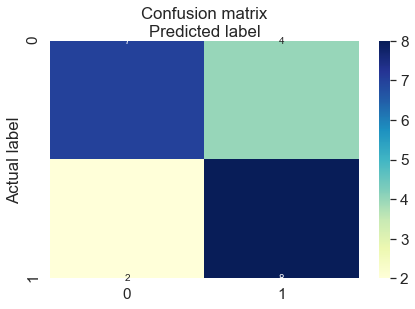

In [92]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

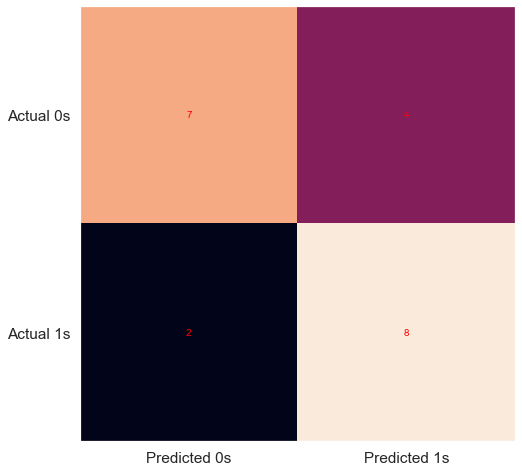

In [93]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [72]:
sa=accuracy_score(y_test, predicted)*100
sa

71.42857142857143

# DECISION TREE

In [94]:
from sklearn import tree

In [95]:
tr = tree.DecisionTreeClassifier()

In [96]:
tr.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [97]:
result=tr.predict(X_test)

In [98]:
cm = metrics.confusion_matrix(y_test, result)
print(cm)

[[7 4]
 [3 7]]


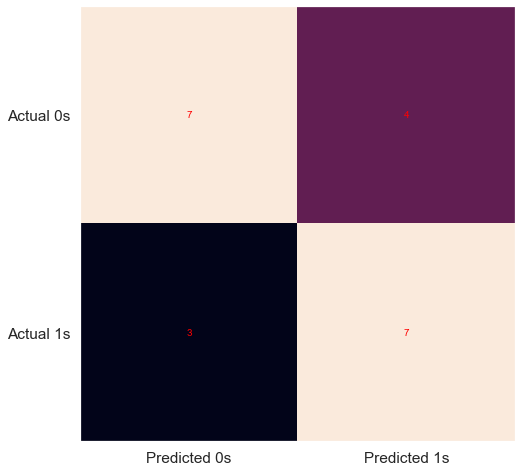

In [99]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [248]:
print("PREDICCITED RESULTS::")
for i in result:
    if i==1:
        print("Good")
    else:
        print("Bad")

PREDICCITED RESULTS::
Bad
Good
Good
Bad
Bad
Bad
Good
Good
Good
Good
Bad
Good
Good
Bad
Good
Bad
Good
Bad
Bad
Bad
Good


In [125]:
accuracy_score(y_test, result)*100

52.38095238095239

# ARTIFICAL NEURAL NETWORK

In [100]:
X_train, X_test, y_train, y_test = train_test_split(Features, Label, test_size=0.15, random_state=424)

In [101]:
X_train=np.asarray(X_train).astype(np.int)
X_test=np.asarray(X_test).astype(np.int)
y_train=np.asarray(y_train).astype(np.int)

In [102]:
import tensorflow as tf

In [103]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [104]:
model=Sequential()
model.add(Dense(16, input_dim=15,activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [105]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [106]:
history=model.fit(X_train,y_train,epochs=10,batch_size=10)

Train on 115 samples
Epoch 1/10
115/115 [==============================] - 1s 7ms/sample - loss: -409.5799 - accuracy: 0.3913
Epoch 2/10
115/115 [==============================] - 0s 295us/sample - loss: -3904.2464 - accuracy: 0.5043
Epoch 3/10
115/115 [==============================] - 0s 304us/sample - loss: -14431.8079 - accuracy: 0.5043
Epoch 4/10
115/115 [==============================] - 0s 269us/sample - loss: -46206.8837 - accuracy: 0.5043
Epoch 5/10
115/115 [==============================] - 0s 287us/sample - loss: -123497.2303 - accuracy: 0.5043
Epoch 6/10
115/115 [==============================] - 0s 252us/sample - loss: -315348.4416 - accuracy: 0.5043
Epoch 7/10
115/115 [==============================] - 0s 313us/sample - loss: -710149.2473 - accuracy: 0.5043
Epoch 8/10
115/115 [==============================] - 0s 295us/sample - loss: -1579654.8641 - accuracy: 0.5043
Epoch 9/10
115/115 [==============================] - 0s 261us/sample - loss: -3405714.4837 - accuracy: 0.5

In [107]:
y_pred=model.predict(X_test)

In [108]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[11  0]
 [10  0]]


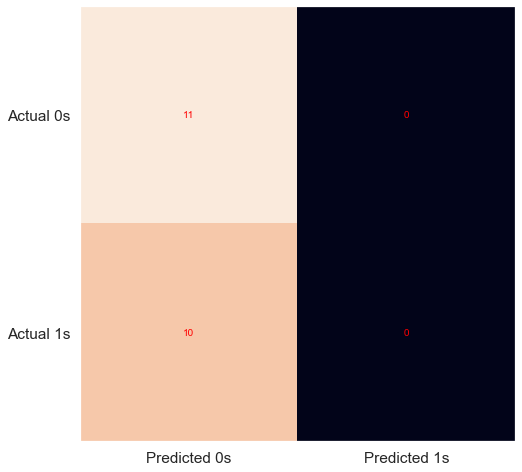

In [109]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [308]:
print("PREDICCITED RESULTS::")
for i in y_pred:
    if i==1:
        print("Good")
    else:
        print("Bad")

PREDICCITED RESULTS::
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good
Good


In [309]:
a= accuracy_score(y_pred,y_test)
print(a*100)

52.38095238095239
